In [4]:
import numpy as np
import pandas as pd

from IPython.display import Image
from pylab import rcParams

from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from io import StringIO

import warnings
warnings.filterwarnings("ignore")

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 6, 6


In [9]:
import pydotplus
from io import StringIO

def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [25]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
# Dataset is now stored in a Pandas Dataframe

ModuleNotFoundError: No module named 'google.colab'

In [33]:
df=pd.read_csv('loan_prediction.csv')


In [34]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [35]:
df.shape

(614, 6)

In [36]:
from sklearn.tree import DecisionTreeClassifier as dt
clf = dt()

In [37]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
X = df.iloc[:,0:len(df.columns)-1].values
Y = df.iloc[:,-1].values

In [39]:
X.shape

(614, 5)

In [40]:
Y.shape

(614,)

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [42]:
X_train.shape

(460, 5)

In [43]:
X_test.shape

(154, 5)

In [44]:
a, b = np.arange(10).reshape((5, 2)), range(5)

In [45]:
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [46]:
b

range(0, 5)

In [47]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(a, b)

In [48]:
X_train1

array([[8, 9],
       [0, 1],
       [4, 5]])

In [49]:
Y_train1

[4, 0, 2]

In [50]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(a, b)

In [51]:
X_train2

array([[0, 1],
       [6, 7],
       [2, 3]])

In [52]:
X_train3, X_test3,Y_train3,Y_test3 = train_test_split(a, b, random_state = 8)

In [53]:
X_train3

array([[2, 3],
       [0, 1],
       [6, 7]])

In [54]:
X_train4, X_test4,Y_train4,Y_test4 = train_test_split(a, b, random_state = 8)

In [55]:
X_train4

array([[2, 3],
       [0, 1],
       [6, 7]])

In [56]:
scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='f1_macro')

In [57]:
scores.mean()

0.6160966316767958

In [58]:
# Fit the model
clf.fit(X_train, Y_train)

# Make predictions
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [59]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [60]:
train_cols = df.columns[0:len(df.columns)-1]

In [61]:
target_cols = df.columns[-1]

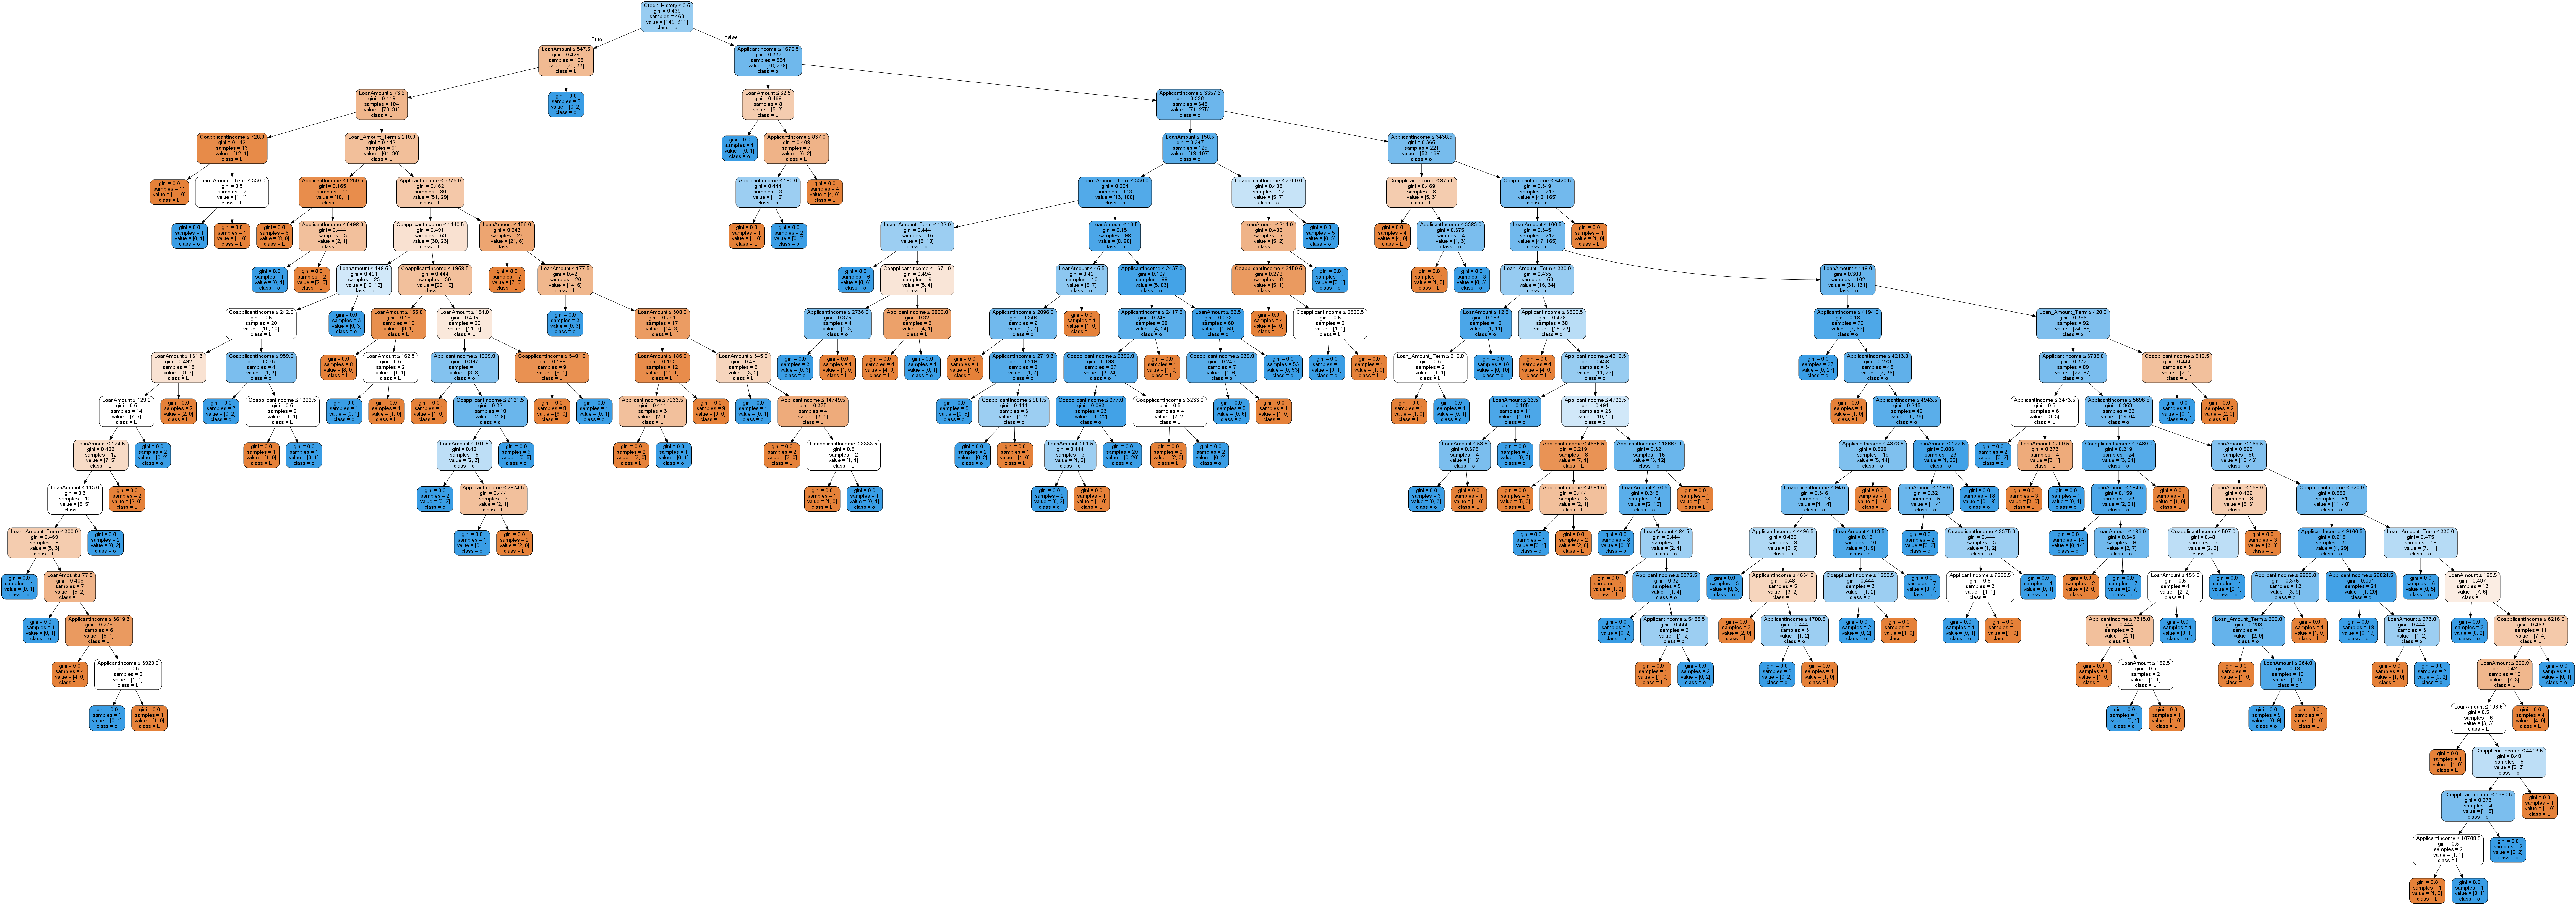

In [62]:
plot_decision_tree(clf, train_cols, target_cols)

In [63]:
print('The Training F1 Score is', f1_score(train_predictions, Y_train))
print('The Testing F1 Score is', f1_score(test_predictions, Y_test))

The Training F1 Score is 1.0
The Testing F1 Score is 0.7649769585253458


In [64]:
parameters = {
                'max_depth':[1,2,3,4,5],
                'min_samples_leaf':[1,2,3,4,5], 
                'min_samples_split':[2,3,4,5], 
                'criterion' : ['gini','entropy']
             }
scorer = make_scorer(f1_score)

In [65]:
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

In [66]:
grid_fit = grid_obj.fit(X_train, Y_train)

In [67]:
best_clf = grid_fit.best_estimator_

In [68]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

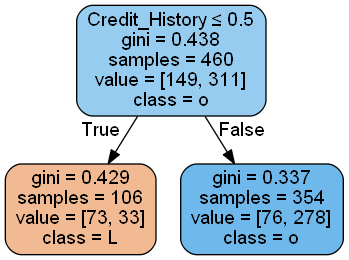

In [69]:
plot_decision_tree(best_clf, train_cols, target_cols)

In [70]:
scores = cross_val_score(best_clf, X_train, Y_train, cv=5, scoring='f1_macro')
scores.mean()

0.7056824255406972

In [71]:
best_clf.fit(X_train, Y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, Y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, Y_test))

The training F1 Score is 0.8360902255639098
The testing F1 Score is 0.8620689655172413
